<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.821177,32.628243,40.152353,-0.000245,121.601528,121.601617,-0.000089
1,0.0,1.0,68.477009,84.476629,54.363894,0.000260,217.317793,217.317554,0.000239
2,0.0,2.0,22.261859,83.135061,88.759347,-0.000316,204.155951,204.156166,-0.000215
3,0.0,3.0,74.824482,84.625636,66.577499,-0.000044,236.027572,236.027795,-0.000222
4,0.0,4.0,69.160169,60.625512,70.465660,-0.000170,210.251171,210.251595,-0.000424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.510733,44.679858,34.252478,0.000889,146.443959,146.442501,0.001458
59996,999.0,56.0,40.117201,84.149688,99.701160,-0.000109,233.967940,233.968906,-0.000966
59997,999.0,57.0,24.655895,66.287601,53.278781,-0.000081,154.222195,154.222899,-0.000704
59998,999.0,58.0,60.411761,30.995031,72.315206,0.001048,173.723046,173.721594,0.001453


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    38.821177  32.628243  40.152353 -0.000245  121.601528   
      1.0    68.477009  84.476629  54.363894  0.000260  217.317793   
      2.0    22.261859  83.135061  88.759347 -0.000316  204.155951   
      3.0    74.824482  84.625636  66.577499 -0.000044  236.027572   
      4.0    69.160169  60.625512  70.465660 -0.000170  210.251171   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.510733  44.679858  34.252478  0.000889  146.443959   
      56.0   40.117201  84.149688  99.701160 -0.000109  233.967940   
      57.0   24.655895  66.287601  53.278781 -0.000081  154.222195   
      58.0   60.411761  30.995031  72.315206  0.001048  173.723046   
      59.0   74.764585  28.096142  43.815382 -0.005407  156.670702   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    121.601617 -0.000089  
      1.0    217.317554  0.000239  
      2.0    204.156166 -0.000215  
      3.0    236.027795 -0.000222  
      4.0    210.251595 -0.000424  
...                 ...       ...  
999.0 55.0   146.442501  0.001458  
      56.0   233.968906 -0.000966  
      57.0   154.222899 -0.000704  
      58.0   173.721594  0.001453  
      59.0   156.675052 -0.004349  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    38.821177  32.628243  40.152353 -0.000245  121.601528   
      1.0    68.477009  84.476629  54.363894  0.000260  217.317793   
      2.0    22.261859  83.135061  88.759347 -0.000316  204.155951   
      3.0    74.824482  84.625636  66.577499 -0.000044  236.027572   
      4.0    69.160169  60.625512  70.465660 -0.000170  210.251171   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.510733  44.679858  34.252478  0.000889  146.443959   
      56.0   40.117201  84.149688  99.701160 -0.000109  233.967940   
      57.0   24.655895  66.287601  53.278781 -0.000081  154.222195   
      58.0   60.411761  30.995031  72.315206  0.001048  173.723046   
      59.0   74.764585  28.096142  43.815382 -0.005407  156.670702   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    121.601617 -0.000089  
      1.0    217.317554  0.000239  
      2.0    204.156166 -0.000215  
      3.0    236.027795 -0.000222  
      4.0    210.251595 -0.000424  
...                 ...       ...  
999.0 55.0   146.442501  0.001458  
      56.0   233.968906 -0.000966  
      57.0   154.222899 -0.000704  
      58.0   173.721594  0.001453  
      59.0   156.675052 -0.004349  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.821177,32.628243,40.152353,-0.000245,121.601528,121.601617,-0.000089
1,0.0,1.0,68.477009,84.476629,54.363894,0.000260,217.317793,217.317554,0.000239
2,0.0,2.0,22.261859,83.135061,88.759347,-0.000316,204.155951,204.156166,-0.000215
3,0.0,3.0,74.824482,84.625636,66.577499,-0.000044,236.027572,236.027795,-0.000222
4,0.0,4.0,69.160169,60.625512,70.465660,-0.000170,210.251171,210.251595,-0.000424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.510733,44.679858,34.252478,0.000889,146.443959,146.442501,0.001458
59996,999.0,56.0,40.117201,84.149688,99.701160,-0.000109,233.967940,233.968906,-0.000966
59997,999.0,57.0,24.655895,66.287601,53.278781,-0.000081,154.222195,154.222899,-0.000704
59998,999.0,58.0,60.411761,30.995031,72.315206,0.001048,173.723046,173.721594,0.001453


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    38.821177  32.628243  40.152353 -0.000245  121.601528   
      1.0    68.477009  84.476629  54.363894  0.000260  217.317793   
      2.0    22.261859  83.135061  88.759347 -0.000316  204.155951   
      3.0    74.824482  84.625636  66.577499 -0.000044  236.027572   
      4.0    69.160169  60.625512  70.465660 -0.000170  210.251171   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.510733  44.679858  34.252478  0.000889  146.443959   
      56.0   40.117201  84.149688  99.701160 -0.000109  233.967940   
      57.0   24.655895  66.287601  53.278781 -0.000081  154.222195   
      58.0   60.411761  30.995031  72.315206  0.001048  173.723046   
      59.0   74.764585  28.096142  43.815382 -0.005407  156.670702   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    121.601617 -0.000089  
      1.0    217.317554  0.000239  
      2.0    204.156166 -0.000215  
      3.0    236.027795 -0.000222  
      4.0    210.251595 -0.000424  
...                 ...       ...  
999.0 55.0   146.442501  0.001458  
      56.0   233.968906 -0.000966  
      57.0   154.222899 -0.000704  
      58.0   173.721594  0.001453  
      59.0   156.675052 -0.004349  

[60000 rows x 7 columns]

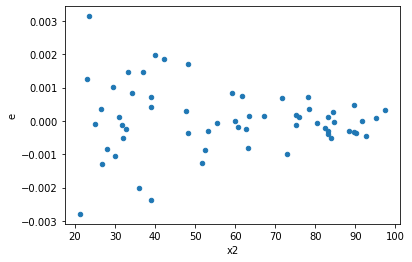

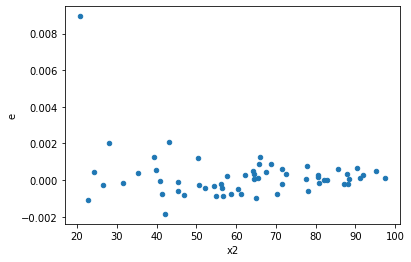

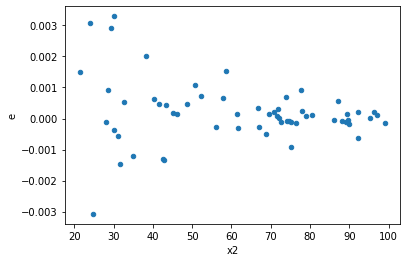

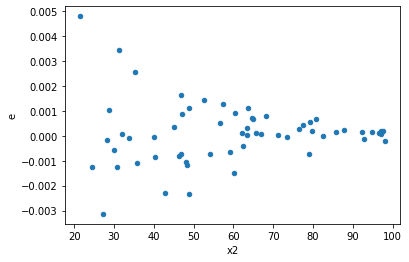

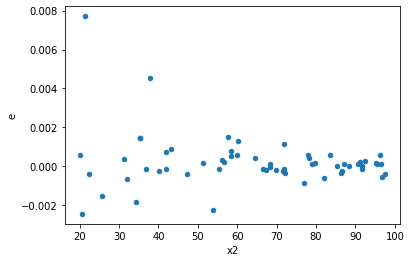

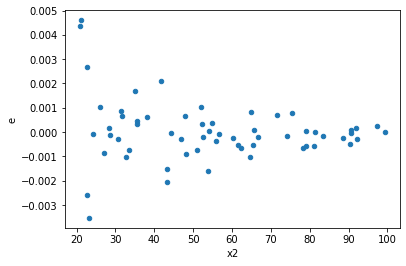

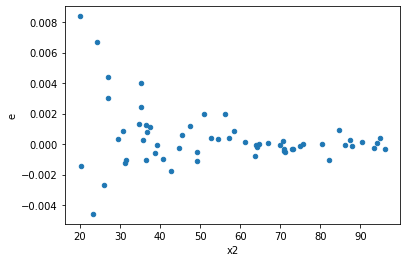

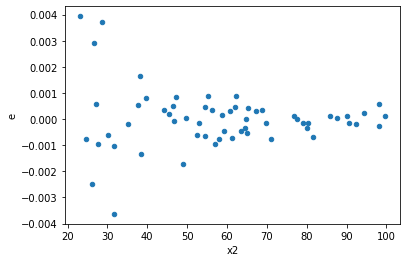

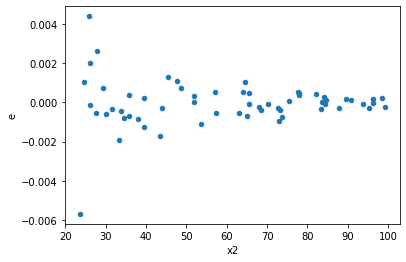

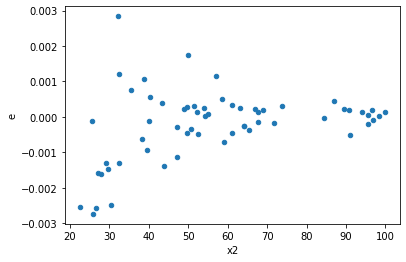

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,34.0,3.553702262951421e-06,8.333968943168809e-05,1.7768511314757106e-07,2.45116733622612e-06,13.795006755520236,1.1305556490981417e-10,0.9999999999434722,5.652778245490708e-11,Reject001=0 : Heteroscedasticity
2.0,26.0,28.0,1.0826719161850679e-05,4.598125994320787e-05,4.1641227545579537e-07,1.6421878551145667e-06,3.943658609288272,0.0005894939070401062,0.99970525304648,0.0002947469535200531,Reject001=0 : Heteroscedasticity
8.0,24.0,30.0,7.042261218706516e-06,7.442160835670552e-05,2.934275507794382e-07,2.4807202785568508e-06,8.45428546831154,1.6796713753208792e-07,0.9999999160164312,8.398356876604396e-08,Reject001=0 : Heteroscedasticity
11.0,30.0,24.0,3.8150468772525137e-05,7.768938813266841e-05,1.2716822924175046e-06,3.237057838861184e-06,2.5454925795242804,0.02161378547856896,0.9891931072607155,0.01080689273928448,Reject001=1 : Homoscedasticity
14.0,29.0,25.0,3.447707234643649e-05,9.811598526088727e-05,1.1888645636702238e-06,3.924639410435491e-06,3.3011661129165737,0.0033583540705384163,0.9983208229647308,0.0016791770352692081,Reject001=0 : Heteroscedasticity
15.0,32.0,22.0,3.3178494600704224e-05,3.553706683763691e-05,1.036827956272007e-06,1.6153212198925868e-06,1.5579452792733288,0.2810884843843855,0.8594557578078073,0.14054424219219275,Reject001=1 : Homoscedasticity
17.0,28.0,26.0,3.37230285482909e-05,3.5968210727508555e-05,1.2043938767246749e-06,1.3833927202887906e-06,1.1486215157875923,0.7254322667707445,0.6372838666146278,0.36271613338537223,Reject001=1 : Homoscedasticity
19.0,35.0,19.0,2.93767596331428e-05,5.368527954797437e-05,8.393359895183657e-07,2.825541028840756e-06,3.3664004214356757,0.0066644500041443955,0.9966677749979278,0.0033322250020721977,Reject001=0 : Heteroscedasticity
20.0,23.0,31.0,6.75363698131732e-06,0.00016973937548748322,2.936363904920574e-07,5.4754637254026845e-06,18.64708838106628,4.603650793910674e-12,0.9999999999976982,2.301825396955337e-12,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,24.0,4.2088723349972166e-05,9.268616392024056e-06,1.4029574449990721e-06,3.86192349667669e-07,0.2752701808912846,0.0010276806892984623,Reject001=0 : Heteroscedasticity
1.0,20.0,34.0,3.553702262951421e-06,8.333968943168809e-05,1.7768511314757106e-07,2.45116733622612e-06,13.795006755520236,1.1305556490981417e-10,Reject001=0 : Heteroscedasticity
2.0,26.0,28.0,1.0826719161850679e-05,4.598125994320787e-05,4.1641227545579537e-07,1.6421878551145667e-06,3.943658609288272,0.0005894939070401062,Reject001=0 : Heteroscedasticity
3.0,24.0,30.0,4.500968721519343e-05,4.29868997569587e-05,1.875403633966393e-06,1.4328966585652901e-06,0.7640470737143551,0.5030949402553063,Reject001=1 : Homoscedasticity
4.0,30.0,24.0,5.044438654831235e-05,3.5063749413014975e-05,1.6814795516104115e-06,1.460989558875624e-06,0.8688714397248444,0.7078300803251278,Reject001=1 : Homoscedasticity
5.0,27.0,27.0,7.663343799672095e-05,1.1589643469884371e-05,2.838275481360035e-06,4.292460544401619e-07,0.15123481045415552,5.063752091689448e-06,Reject001=0 : Heteroscedasticity
6.0,26.0,28.0,0.0001243485833881298,4.373414488502803e-05,4.782637822620377e-06,1.5619337458938583e-06,0.3265841579110175,0.005329132646690083,Reject001=0 : Heteroscedasticity
7.0,32.0,22.0,6.675679693830315e-05,6.414734371639037e-06,2.0861499043219733e-06,2.915788350745017e-07,0.13976887972931587,8.335370967756926e-07,Reject001=0 : Heteroscedasticity
8.0,24.0,30.0,7.042261218706516e-06,7.442160835670552e-05,2.934275507794382e-07,2.4807202785568508e-06,8.45428546831154,1.6796713753208792e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    684
Reject001=1 : Homoscedasticity      316
Name: Result_test, dtype: int64